In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
import datetime as dt

In [ ]:
import yfinance as yf
from datetime import datetime

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data Fetching and Analysis

In [ ]:
# Public Provident fund
risk_free_rate = 7.1/(365*100)


In [ ]:
# data = yf.download(tickers = 'RELIANCE.NS TCS INFY HDB HINDUNILVR.NS ICICIBANK.NS SBIN.NS ITC.NS KOTAKBANK.NS LT.NS',start = dt.datetime.today() - dt.timedelta(90),
# end = dt.datetime.today(),interval='1d')

# Define the tickers of your assets
tickers = ['RELIANCE.NS', 'TCS', 'INFY', 'HDB', 'HINDUNILVR.NS',
           'ICICIBANK.NS', 'SBIN.NS', 'ITC.NS', 'KOTAKBANK.NS', 'LT.NS']

# Download historical data for your assets
data = yf.download(tickers, start=dt.datetime.today() - dt.timedelta(90), end=dt.datetime.today(), interval='1d')['Adj Close']

# Download historical data for the market index (e.g., S&P 500)
market_data = yf.download('^NSEBANK', start=dt.datetime.today() - dt.timedelta(90), end=dt.datetime.today(), interval='1d')['Adj Close']

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# # Use the pct_change() method to calculate the daily returns for each stock.
# returns = data.pct_change()
# returns

# Calculate daily returns for each asset and the market index
returns = pd.concat([data.pct_change(), market_data.pct_change()], axis=1).dropna()
returns.rename(columns={'Adj Close': 'Market_Returns'}, inplace=True)
returns

,HDB,HINDUNILVR.NS,ICICIBANK.NS,INFY,ITC.NS,KOTAKBANK.NS,LT.NS,RELIANCE.NS,SBIN.NS,TCS,Market_Returns
Date,,,,,,,,,,,
2023-11-29,0.020219,0.005776,0.015235,-0.000567,0.004480,0.006428,0.011066,0.002631,0.007352,0.026882,0.015622
2023-11-30,-0.008423,0.008119,-0.004949,-0.003973,-0.003202,0.001141,0.008253,-0.009685,-0.006771,-0.015707,-0.001901
2023-12-01,0.011159,0.007110,0.012568,0.010256,0.032125,-0.002820,0.026196,0.007087,0.012395,0.058511,0.007474
2023-12-04,0.042003,0.015076,0.047005,-0.002256,0.009449,0.038875,0.038519,0.010817,0.040140,0.070352,0.036087
2023-12-05,-0.006007,-0.015006,0.022448,-0.013002,-0.005065,0.005444,0.000573,0.007251,0.022785,-0.061033,0.012510
2023-12-06,-0.002386,0.001717,-0.010065,0.013173,0.025457,-0.003856,0.023179,0.009579,0.000329,0.005000,-0.003780
2023-12-07,0.010043,-0.019239,-0.004236,-0.002827,-0.011117,0.002992,-0.010819,-0.001646,0.005341,-0.024876,0.000146
2023-12-08,0.018624,0.001608,0.011862,0.014172,-0.019537,0.006350,0.006809,-0.000529,0.004005,0.000000,0.008979
2023-12-11,0.008522,-0.007394,0.006183,-0.026831,0.007347,0.003046,0.002176,0.001466,0.000163,-0.005102,0.001106


In [ ]:
# Calculate the mean, variance and correlation factor for each stock.
mean_returns = returns.mean()
var_daily_returns = returns.var()
cov_matrix = returns.cov()
std_dev_daily_returns = returns.std()
correlation_matrix = returns.corr()

In [ ]:
mean_returns

HDB              -0.001374
HINDUNILVR.NS    -0.000755
ICICIBANK.NS      0.002063
INFY              0.002432
ITC.NS           -0.001059
KOTAKBANK.NS     -0.000075
LT.NS             0.002179
RELIANCE.NS       0.003726
SBIN.NS           0.005176
TCS              -0.003635
Market_Returns    0.001176
dtype: float64

In [ ]:
var_daily_returns

HDB               0.000455
HINDUNILVR.NS     0.000178
ICICIBANK.NS      0.000185
INFY              0.000222
ITC.NS            0.000160
KOTAKBANK.NS      0.000159
LT.NS             0.000248
RELIANCE.NS       0.000204
SBIN.NS           0.000289
TCS               0.006771
Market_Returns    0.000123
dtype: float64

In [ ]:
std_dev_daily_returns

HDB               0.021339
HINDUNILVR.NS     0.013349
ICICIBANK.NS      0.013592
INFY              0.014910
ITC.NS            0.012635
KOTAKBANK.NS      0.012608
LT.NS             0.015739
RELIANCE.NS       0.014270
SBIN.NS           0.016993
TCS               0.082288
Market_Returns    0.011086
dtype: float64

In [ ]:
cov_matrix

,HDB,HINDUNILVR.NS,ICICIBANK.NS,INFY,ITC.NS,KOTAKBANK.NS,LT.NS,RELIANCE.NS,SBIN.NS,TCS,Market_Returns
HDB,0.000455,0.000064,0.000092,5.675441e-05,0.000044,1.100684e-04,0.000059,0.000037,0.000095,1.620256e-04,1.404241e-04
HINDUNILVR.NS,0.000064,0.000178,-0.000019,2.953090e-06,0.000065,2.787560e-05,0.000090,0.000056,0.000087,4.606871e-05,5.390326e-05
ICICIBANK.NS,0.000092,-0.000019,0.000185,1.116990e-05,0.000034,1.115388e-04,0.000055,0.000020,0.000042,-7.525614e-05,1.022982e-04
INFY,0.000057,0.000003,0.000011,2.223172e-04,0.000044,6.865430e-07,0.000066,0.000037,0.000016,1.536587e-04,5.003376e-06
ITC.NS,0.000044,0.000065,0.000034,4.422832e-05,0.000160,3.491329e-05,0.000071,0.000042,0.000047,-6.097384e-05,4.828787e-05
KOTAKBANK.NS,0.000110,0.000028,0.000112,6.865430e-07,0.000035,1.589578e-04,0.000066,0.000066,0.000068,-1.432762e-04,1.119855e-04
LT.NS,0.000059,0.000090,0.000055,6.554341e-05,0.000071,6.613328e-05,0.000248,0.000063,0.000041,7.371411e-05,5.535681e-05
RELIANCE.NS,0.000037,0.000056,0.000020,3.707276e-05,0.000042,6.649498e-05,0.000063,0.000204,0.000097,1.303487e-04,6.047000e-05
SBIN.NS,0.000095,0.000087,0.000042,1.634603e-05,0.000047,6.758807e-05,0.000041,0.000097,0.000289,1.914569e-04,1.095905e-04
TCS,0.000162,0.000046,-0.000075,1.536587e-04,-0.000061,-1.432762e-04,0.000074,0.000130,0.000191,6.771322e-03,9.198633e-08


In [ ]:
correlation_matrix

,HDB,HINDUNILVR.NS,ICICIBANK.NS,INFY,ITC.NS,KOTAKBANK.NS,LT.NS,RELIANCE.NS,SBIN.NS,TCS,Market_Returns
HDB,1.000000,0.224556,0.317507,0.178378,0.164143,0.409119,0.177026,0.121290,0.261442,0.092273,0.593578
HINDUNILVR.NS,0.224556,1.000000,-0.104304,0.014836,0.386712,0.165623,0.429957,0.296531,0.384730,0.041938,0.364217
ICICIBANK.NS,0.317507,-0.104304,1.000000,0.055115,0.199776,0.650868,0.259250,0.101294,0.182703,-0.067284,0.678865
INFY,0.178378,0.014836,0.055115,1.000000,0.234768,0.003652,0.279292,0.174240,0.064512,0.125237,0.030268
ITC.NS,0.164143,0.386712,0.199776,0.234768,1.000000,0.219167,0.358034,0.231413,0.219607,-0.058645,0.344723
KOTAKBANK.NS,0.409119,0.165623,0.650868,0.003652,0.219167,1.000000,0.333269,0.369595,0.315462,-0.138101,0.801177
LT.NS,0.177026,0.429957,0.259250,0.279292,0.358034,0.333269,1.000000,0.280471,0.154713,0.056915,0.317245
RELIANCE.NS,0.121290,0.296531,0.101294,0.174240,0.231413,0.369595,0.280471,1.000000,0.398205,0.111007,0.382231
SBIN.NS,0.261442,0.384730,0.182703,0.064512,0.219607,0.315462,0.154713,0.398205,1.000000,0.136915,0.581699
TCS,0.092273,0.041938,-0.067284,0.125237,-0.058645,-0.138101,0.056915,0.111007,0.136915,1.000000,0.000101


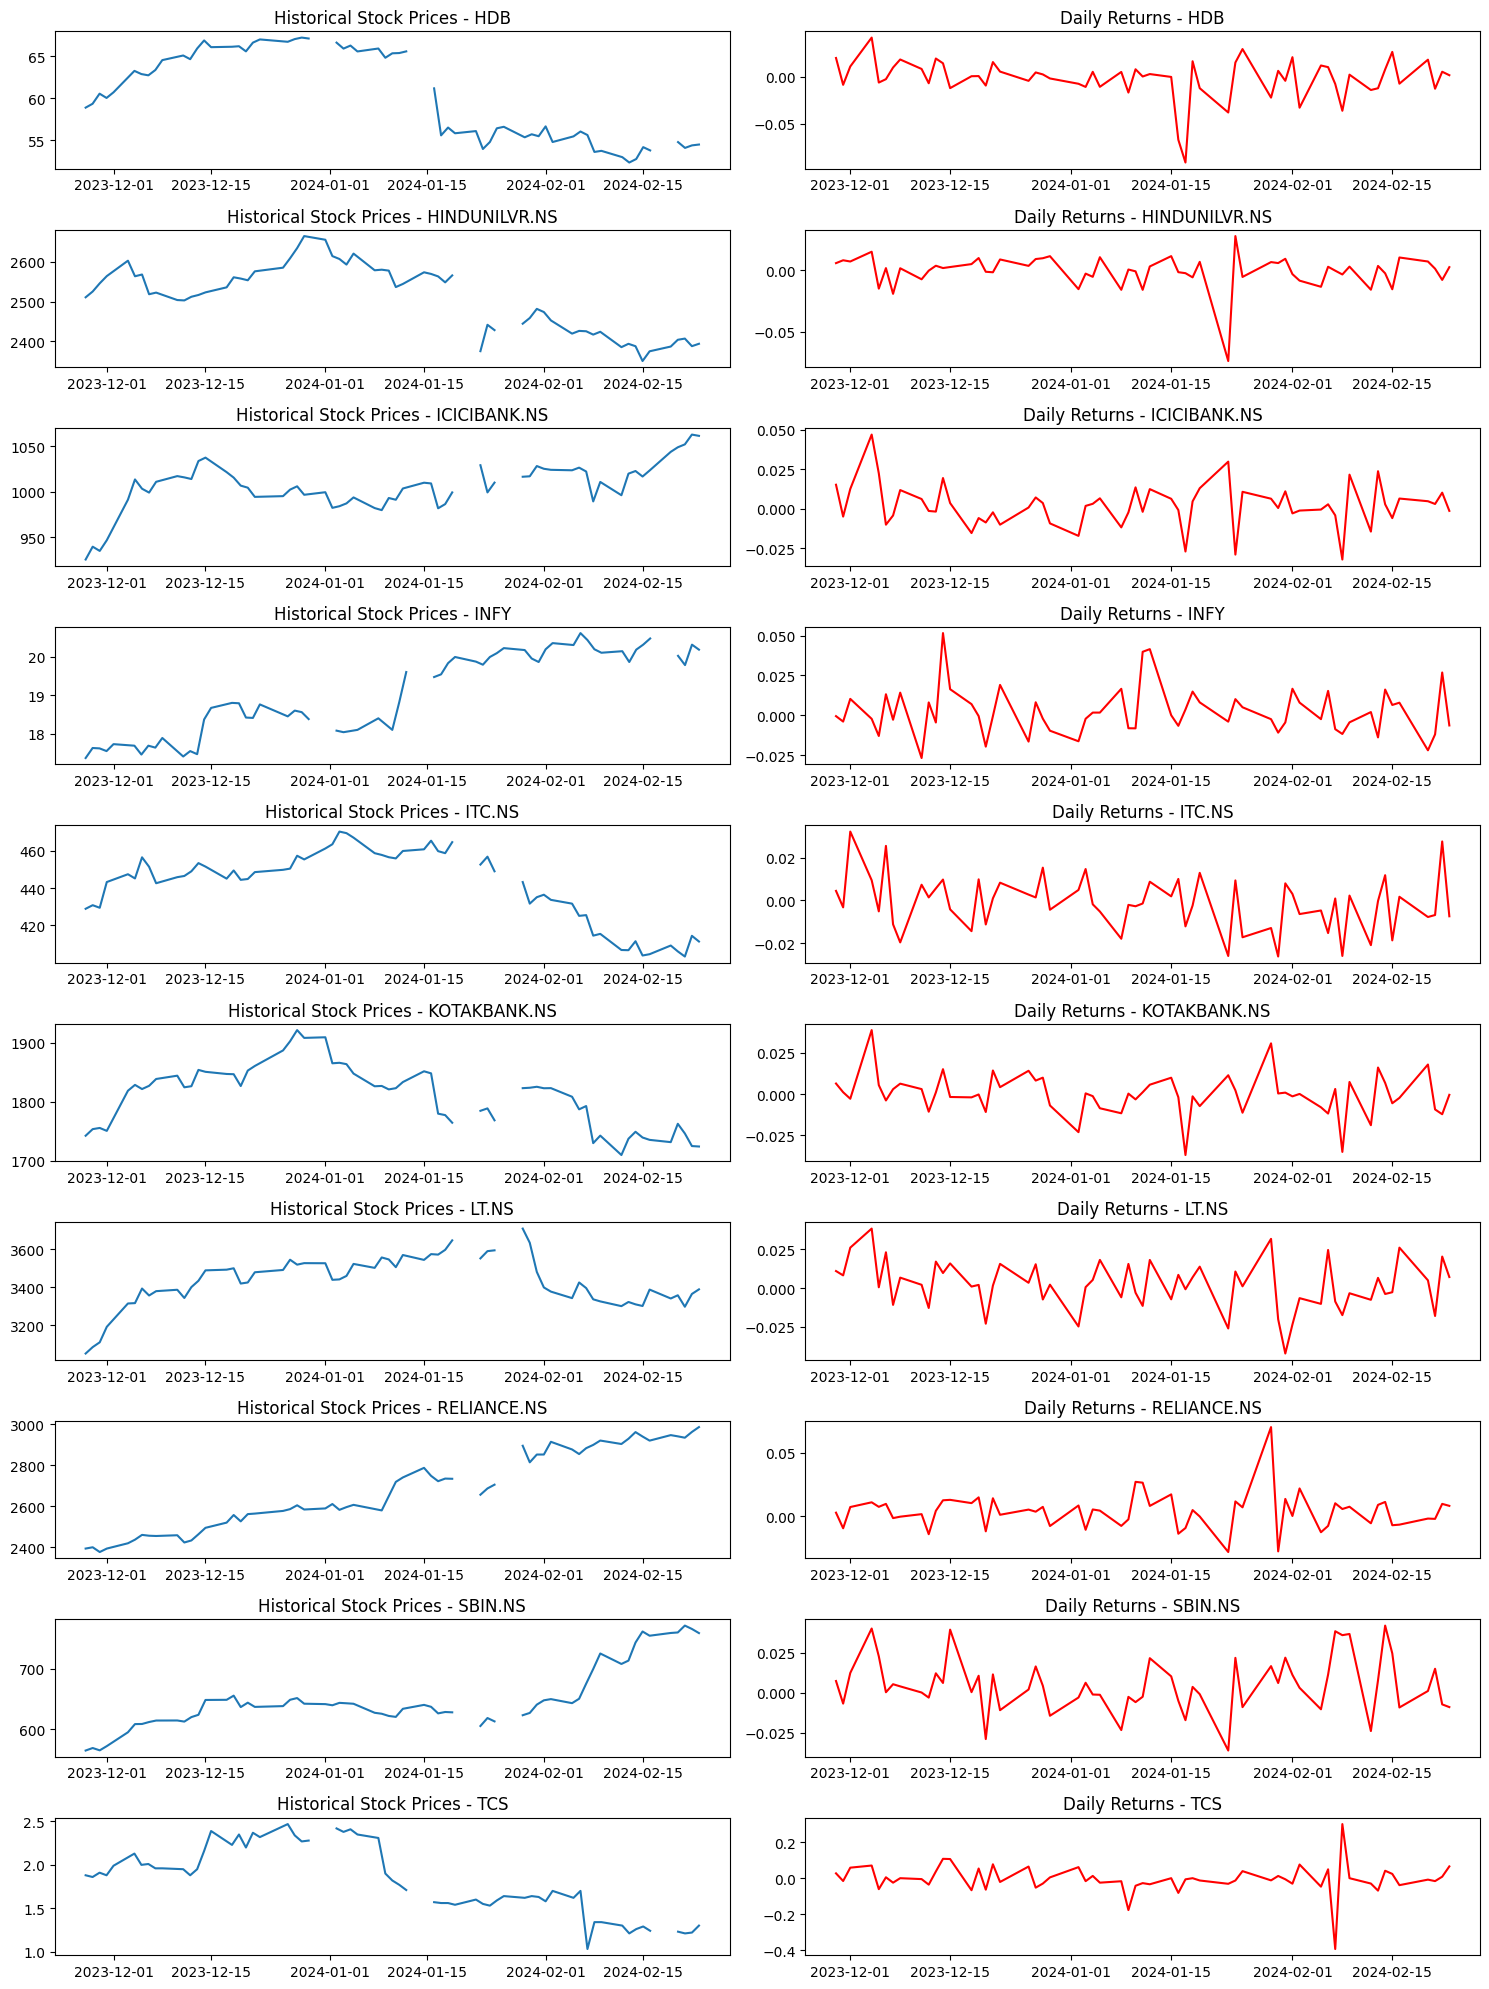

In [ ]:
# Visualize historical prices and daily returns
plt.figure(figsize=(15, 2 * len(data.columns)))
for index, column in enumerate(data.columns):
    # Plot historical stock prices
    plt.subplot(len(data.columns), 2, 2 * index + 1)
    plt.plot(data[column])
    plt.title(f'Historical Stock Prices - {column}')

    # Plot daily returns
    plt.subplot(len(data.columns), 2, 2 * index + 2)
    plt.plot(returns[column], color='red')
    plt.title(f'Daily Returns - {column}')

plt.tight_layout()
plt.show()


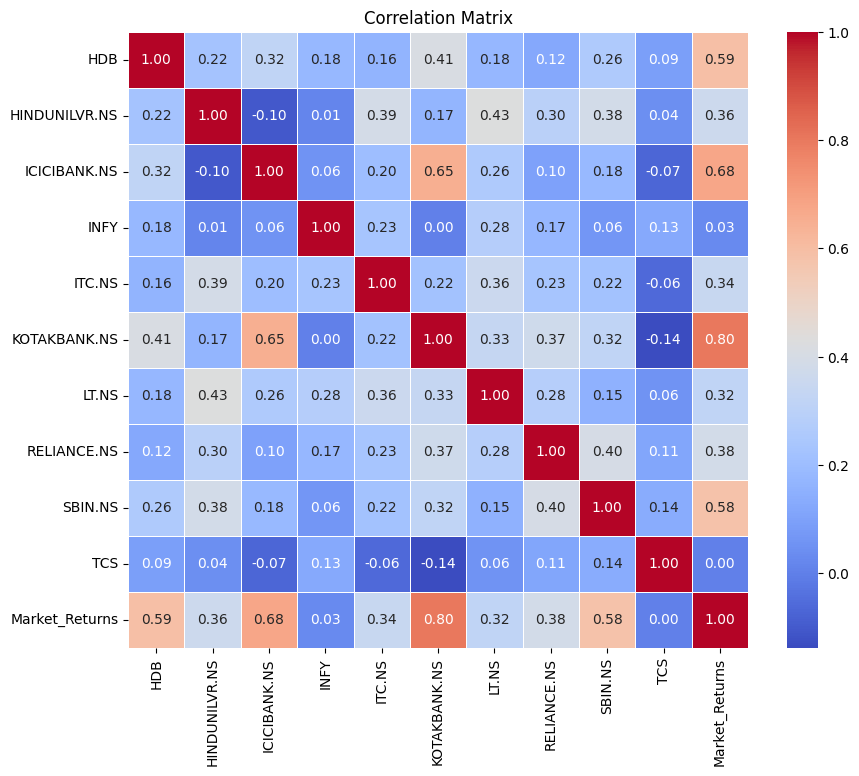

In [ ]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:

# Calculate covariance between each asset and the market index
covariance = cov_matrix.iloc[:-1, -1]

# Calculate variance of the market index returns
market_variance = returns['Market_Returns'].var()

# Calculate beta for each asset
betas = covariance / market_variance
beta_values = {}
# Print betas
for i, ticker in enumerate(tickers):
    print(f'Beta for {ticker}: {betas[i]:.2f}')
    beta_values[ticker] = betas[i]

Beta for RELIANCE.NS: 1.14
Beta for TCS: 0.44
Beta for INFY: 0.83
Beta for HDB: 0.04
Beta for HINDUNILVR.NS: 0.39
Beta for ICICIBANK.NS: 0.91
Beta for SBIN.NS: 0.45
Beta for ITC.NS: 0.49
Beta for KOTAKBANK.NS: 0.89
Beta for LT.NS: 0.00


In [ ]:
mean_returns.index

Index(['HDB', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INFY', 'ITC.NS',
       'KOTAKBANK.NS', 'LT.NS', 'RELIANCE.NS', 'SBIN.NS', 'TCS',
       'Market_Returns'],
      dtype='object')

In [ ]:
if "Market_Returns" in mean_returns.index:
    mean_returns.drop(index="Market_Returns", inplace=True)
if "Market_Returns" in returns.columns:
    returns.drop(columns="Market_Returns", inplace=True)
# Remove the corresponding row and column from the covariance matrix
if "Market_Returns" in cov_matrix.columns:
  cov_matrix.drop(index="Market_Returns", columns="Market_Returns", inplace=True)


In [ ]:
# Calculate expected return for each asset using CAPM formula
expected_returns_capm = {}
for asset, beta in beta_values.items():
    expected_return = risk_free_rate + beta * (mean_returns[asset] - risk_free_rate)
    expected_returns_capm[asset] = expected_return

# Print the expected return for each asset
print("Expected Returns using CAPM formula:")
for asset, expected_return in expected_returns_capm.items():
    print(f"{asset}: {expected_return:.2%}")

Expected Returns using CAPM formula:
RELIANCE.NS: 0.42%
TCS: -0.15%
INFY: 0.21%
HDB: 0.01%
HINDUNILVR.NS: -0.02%
ICICIBANK.NS: 0.19%
SBIN.NS: 0.24%
ITC.NS: -0.04%
KOTAKBANK.NS: -0.00%
LT.NS: 0.02%


In [ ]:
mean_returns

HDB             -0.001374
HINDUNILVR.NS   -0.000755
ICICIBANK.NS     0.002063
INFY             0.002432
ITC.NS          -0.001059
KOTAKBANK.NS    -0.000075
LT.NS            0.002179
RELIANCE.NS      0.003726
SBIN.NS          0.005176
TCS             -0.003635
dtype: float64

In [ ]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *90
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(90)
    return std, returns

In [ ]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(10)
        weights /= np.sum(weights)
        weigths*=0.8
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [ ]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [ ]:
def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 0.8})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [ ]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

In [ ]:
def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 0.8})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [ ]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 0.8})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [ ]:
def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.26
Annualised Volatility: 0.07


            HDB  HINDUNILVR.NS  ICICIBANK.NS   INFY  ITC.NS  KOTAKBANK.NS  \
allocation  0.0            0.0         13.65  16.56     0.0           0.0   

            LT.NS  RELIANCE.NS  SBIN.NS  TCS  
allocation   1.21        20.76    27.83  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.07
Annualised Volatility: 0.06


            HDB  HINDUNILVR.NS  ICICIBANK.NS   INFY  ITC.NS  KOTAKBANK.NS  \
allocation  0.0          20.99         19.84  16.24    8.06          6.56   

            LT.NS  RELIANCE.NS  SBIN.NS   TCS  
allocation    0.0         7.87      0.0  0.44  
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

HDB : annuaised return -

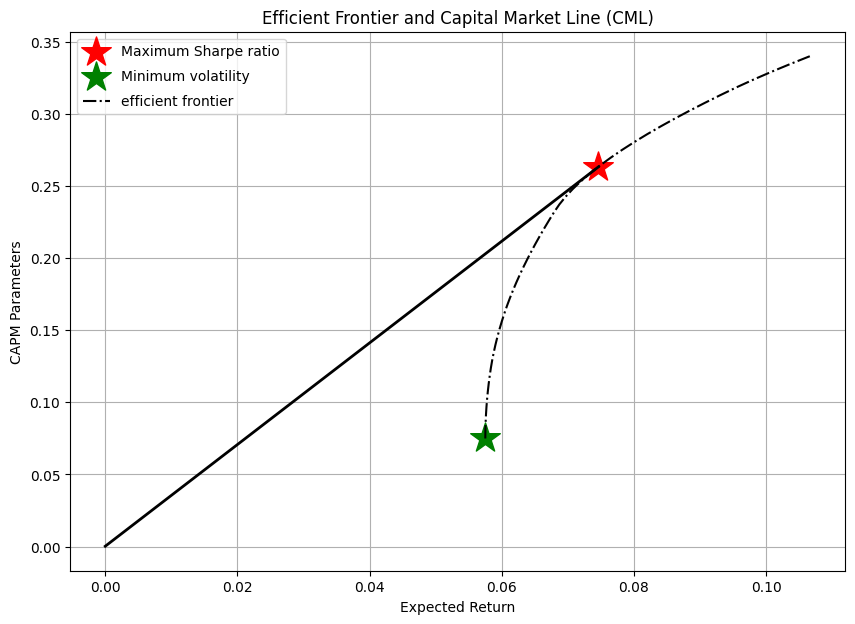

In [ ]:
# Showing that it is a tangent line to the efficient frontier.
def plot_efficient_frontier_and_cml(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=returns.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=returns.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    # Create an optimized portfolio dictionary
    optimized_portfolios = {
        'max_sharpe_ratio': {
            'weights': max_sharpe.x,
            'return': rp,
            'volatility': sdp
        },
        'min_volatility': {
            'weights': min_vol.x,
            'return': rp_min,
            'volatility': sdp_min
        }
    }

    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252

    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(returns.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)

    fig, ax = plt.subplots(figsize=(10, 7))
    # ax.scatter(an_vol,an_rt,marker='o',s=200)

    # for i, txt in enumerate(returns.columns):
    #     ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Efficient Frontier and Capital Market Line (CML)')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

    plt.plot([0, round(sdp,4)], [risk_free_rate, round(rp,4)], 'k-', linewidth=2, label='Tangent to the efficient frontier')
    plt.grid(True)
    plt.xlabel('Expected Return')
    plt.ylabel('CAPM Parameters')
    plt.show()
    return optimized_portfolios
optimized_portfolios = plot_efficient_frontier_and_cml(mean_returns, cov_matrix, risk_free_rate)

In [ ]:
# Calculate the maximum Sharpe ratio portfolio
max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)

# Get the annualized volatility and return of the maximum Sharpe ratio portfolio
sdp_max_sharpe, rp_max_sharpe = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)

print(f"Tangency point on efficient frontier where CML touches it is {(round(rp_max_sharpe, 2),round(sdp_max_sharpe, 2))}")


Tangency point on efficient frontier where CML touches it is (0.26, 0.07)


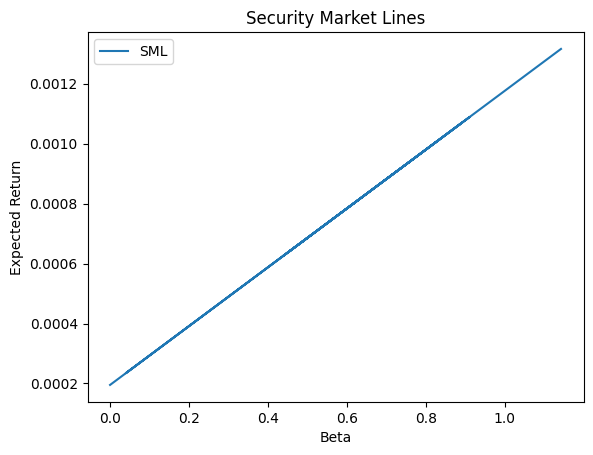

In [ ]:
# Calculate the expected returns for each asset at different levels of beta
asset1_ers = risk_free_rate + betas[0] * (market_data.pct_change().mean() - risk_free_rate)
asset2_ers = risk_free_rate + betas[1] * (market_data.pct_change().mean() - risk_free_rate)
asset3_ers = risk_free_rate + betas[2] * (market_data.pct_change().mean() - risk_free_rate)

sml = risk_free_rate + betas * (market_data.pct_change().mean() - risk_free_rate)

# Plot the Security Market Lines
plt.plot(betas, sml, label='SML')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.title('Security Market Lines')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Calculate Sharpe Ratio and Treynor Ratio for each portfolio and individual asset
portfolio_sharpe_ratios = {}
portfolio_treynor_ratios = {}

# For each optimized portfolio
for portfolio_name, portfolio_info in optimized_portfolios.items():
    # Calculate portfolio return and volatility
    portfolio_weights = portfolio_info['weights']
    portfolio_return = np.dot(portfolio_weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_matrix, portfolio_weights)))

    # Calculate excess return
    excess_return = portfolio_return - risk_free_rate

    # Calculate Sharpe Ratio
    sharpe_ratio = excess_return / portfolio_volatility
    # Calculate Treynor Ratio
    beta_portfolio = np.dot(portfolio_weights, betas)
    treynor_ratio = excess_return / beta_portfolio

    # Store Sharpe Ratio and Treynor Ratio for the portfolio
    portfolio_sharpe_ratios[portfolio_name] = sharpe_ratio
    portfolio_treynor_ratios[portfolio_name] = treynor_ratio

# Print Sharpe Ratio and Treynor Ratio for portfolios
print("Portfolio Sharpe Ratios:")
for portfolio, sharpe_ratio in portfolio_sharpe_ratios.items():
    print(f"{portfolio} portfolio: {sharpe_ratio}")

print("\nPortfolio Treynor Ratios:")
for portfolio, treynor_ratio in portfolio_treynor_ratios.items():
    print(f"{portfolio} portfolio: {treynor_ratio}")


Portfolio Sharpe Ratios:
max_sharpe_ratio portfolio: 0.3473005740751381
min_volatility portfolio: 0.1052317697407258

Portfolio Treynor Ratios:
max_sharpe_ratio portfolio: 0.005734574920040447
min_volatility portfolio: 0.001619179304703188


In [ ]:
# Calculate Sharpe Ratio and Treynor Ratio for each individual asset
asset_sharpe_ratios = {}
asset_treynor_ratios = {}

for asset in tickers:
    # Calculate excess return
    excess_return_asset = expected_returns_capm[asset] - risk_free_rate

    # Calculate Sharpe Ratio
    sharpe_ratio_asset = excess_return_asset / std_dev_daily_returns[asset]

    # Calculate Treynor Ratio
    beta_asset = beta_values[asset]
    treynor_ratio_asset = excess_return_asset / beta_asset

    # Store Sharpe Ratio and Treynor Ratio for the asset
    asset_sharpe_ratios[asset] = sharpe_ratio_asset
    asset_treynor_ratios[asset] = treynor_ratio_asset



# Print Sharpe Ratio and Treynor Ratio for individual assets
print("\nAsset Sharpe Ratios:")
for asset, sharpe_ratio in asset_sharpe_ratios.items():
    print(f"{asset}: {sharpe_ratio}")

print("\nAsset Treynor Ratios:")
for asset, treynor_ratio in asset_treynor_ratios.items():
    print(f"{asset}: {treynor_ratio}")


Asset Sharpe Ratios:
RELIANCE.NS: 0.2827510927660742
TCS: -0.020409732934092328
INFY: 0.12492269095801321
HDB: -0.002991574844438204
HINDUNILVR.NS: -0.027946683370393178
ICICIBANK.NS: 0.1252238206958829
SBIN.NS: 0.13202290494671146
ITC.NS: -0.04880078205972612
KOTAKBANK.NS: -0.01902775313967368
LT.NS: 9.435364629122385e-05

Asset Treynor Ratios:
RELIANCE.NS: 0.003531580410074106
TCS: -0.0038295159785722904
INFY: 0.0022379200047535964
HDB: -0.001568170689197713
HINDUNILVR.NS: -0.000949596548292983
ICICIBANK.NS: 0.001868109082702987
SBIN.NS: 0.004981331371494623
ITC.NS: -0.0012532768200315088
KOTAKBANK.NS: -0.00026905454929599434
LT.NS: 0.001984283849199401
